# PDP图与ICE图实现可解释性分析可视化

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('process_heart.csv')

# 划分特征和标签
X = df.drop('target',axis=1)
y = df['target']

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 构建随机森林模型
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)

# 在测试集上预测
y_predict = model.predict(X_test)

# eli5实现可解释性分析
* permutation importance (排列重要性): 评估随机排列特征值后的预测结果和原有预测结果的偏差（描述特征重要性指标）

In [2]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0361 ± 0.0321,num_major_vessels
0.0230 ± 0.0161,rest_ecg_normal
0.0197 ± 0.0131,sex_female
0.0197 ± 0.0245,thalassemia_reversable defect
0.0164 ± 0.0464,thalassemia_fixed defect
0.0164 ± 0.0415,st_depression
0.0164 ± 0.0293,sex_male
0.0164 ± 0.0207,rest_ecg_ST-T wave abnormality
0.0131 ± 0.0131,exercise_induced_angina_yes
0.0066 ± 0.0161,exercise_induced_angina_no


In [3]:
base_features = df.columns.values.tolist()
base_features.remove('target')
base_features

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'sex_female',
 'sex_male',
 'chest_pain_type_asymptomatic',
 'chest_pain_type_atypical angina',
 'chest_pain_type_non-anginal pain',
 'chest_pain_type_typical angina',
 'fasting_blood_sugar_greater than 120mg/ml',
 'fasting_blood_sugar_lower than 120mg/ml',
 'rest_ecg_ST-T wave abnormality',
 'rest_ecg_left ventricular hypertrophy',
 'rest_ecg_normal',
 'exercise_induced_angina_no',
 'exercise_induced_angina_yes',
 'st_slope_downsloping',
 'st_slope_flat',
 'st_slope_upsloping',
 'thalassemia_fixed defect',
 'thalassemia_normal',
 'thalassemia_reversable defect',
 'thalassemia_unknown']

# PDP图

PDP图反映了某一特征在不同值变化时对模型预测结果的影响。

注意对比PDP图和先验数据集不同类别分布的差异。

In [4]:
from pdpbox import info_plots, get_dataset, pdp, get_dataset, info_plots

## 性别

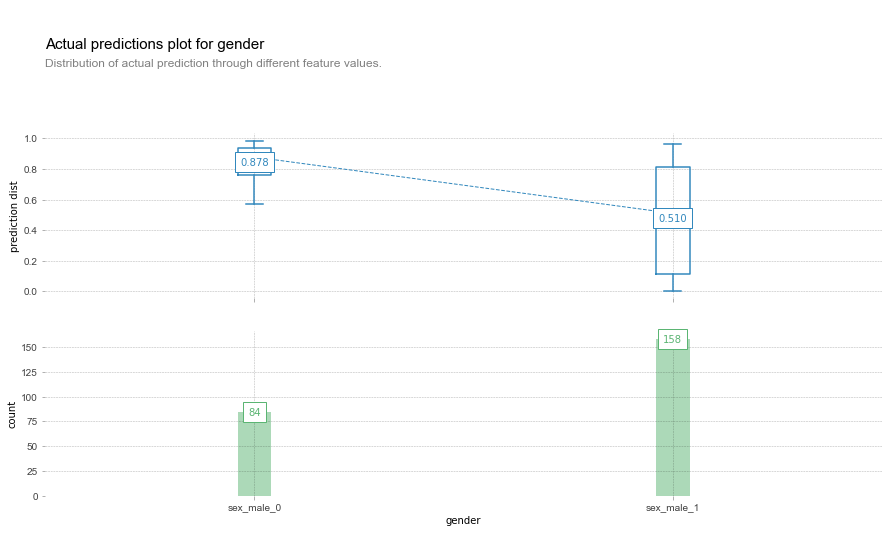

In [5]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature='sex_male', feature_name='gender',predict_kwds={}
)

原始数据集中，性别特征统计分布，及患心脏病和不患心脏病类别分布图。

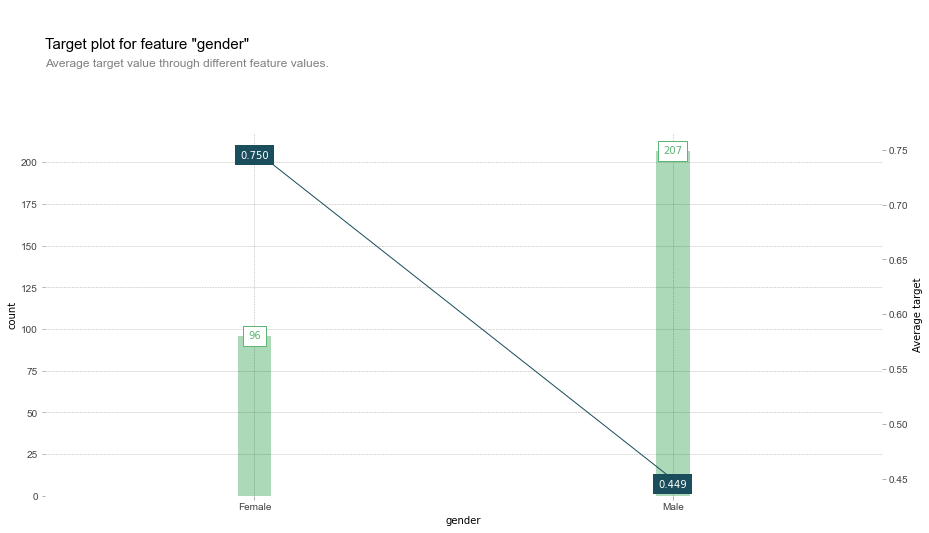

In [6]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature='sex_male', feature_name='gender', target=['target']
)
_ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

## 心脏周围大血管个数

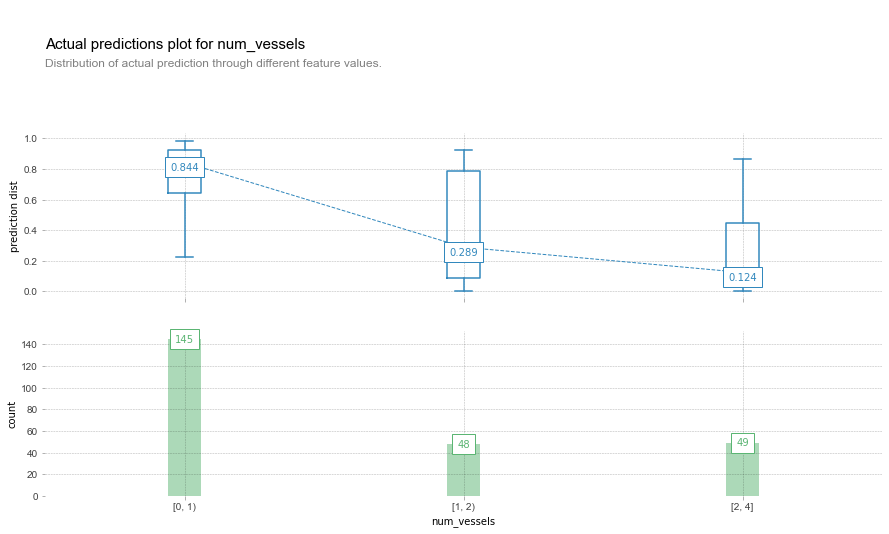

In [7]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature='num_major_vessels', feature_name='num_vessels',predict_kwds={}
)

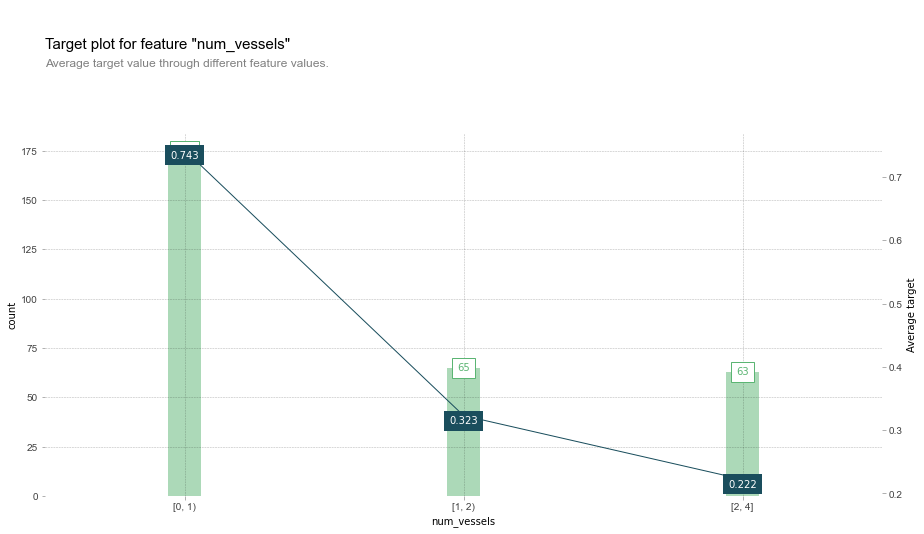

In [8]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature='num_major_vessels', feature_name='num_vessels', target=['target']
)
# _ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

## 最大心率

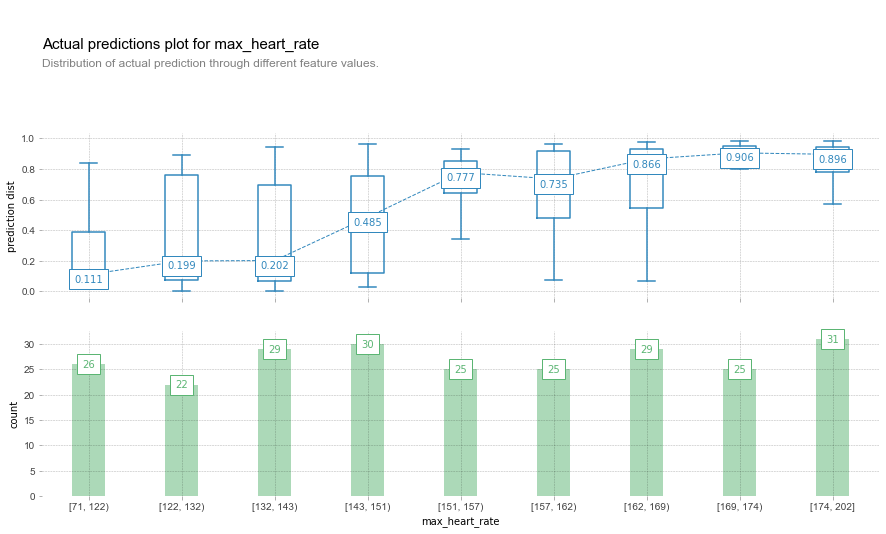

In [9]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature='max_heart_rate_achieved', feature_name='max_heart_rate',predict_kwds={}
)

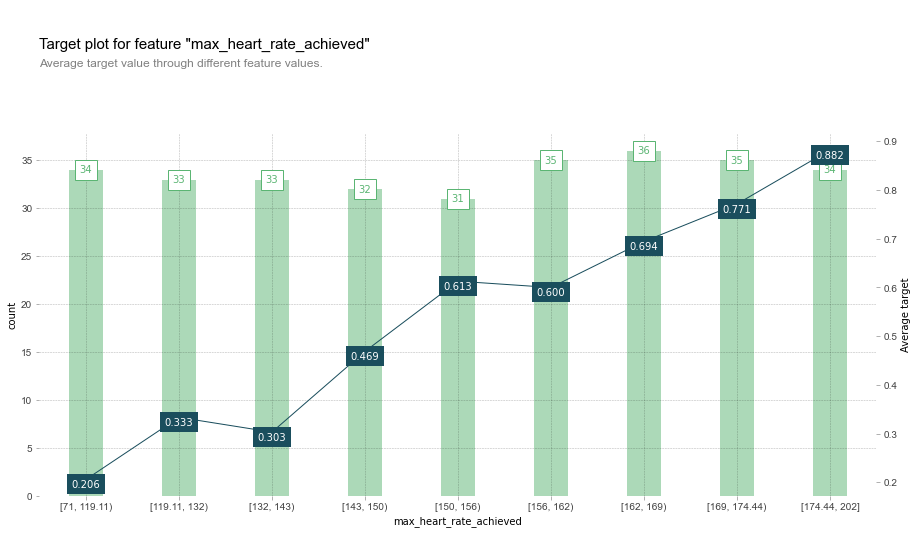

In [10]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature='max_heart_rate_achieved', feature_name='max_heart_rate_achieved', target=['target']
)
# _ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

# ICE图

将测试集每一个样本的PDP图单独显示出来，即是ICE图。

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (2).

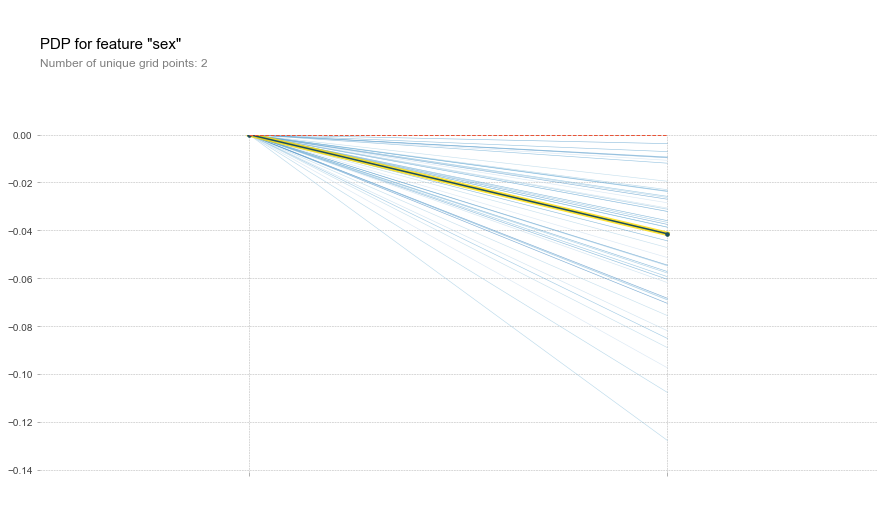

In [11]:
feat_name = 'sex_male'
nick_name = 'sex'
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_features, feature=feat_name
)
# more info
fig, axes = pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

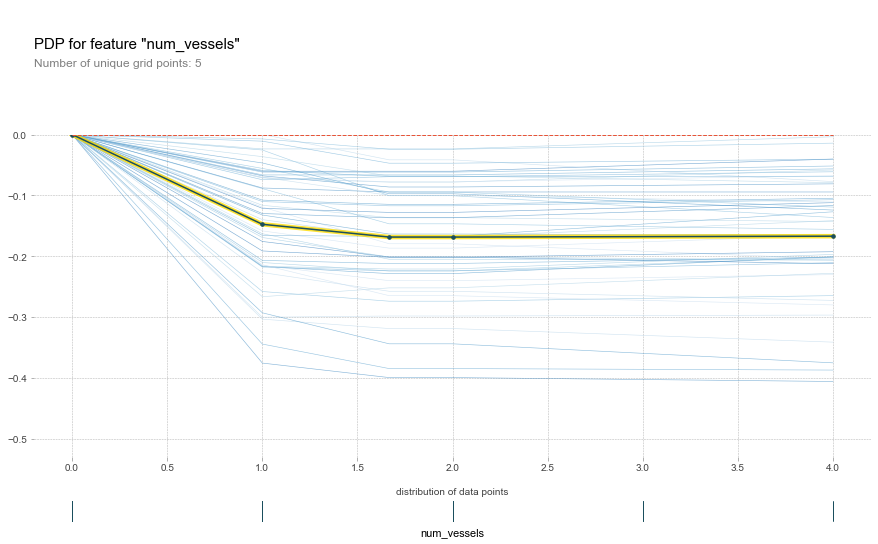

In [12]:
feat_name = 'num_major_vessels'
nick_name = 'num_vessels'
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_features, feature=feat_name
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

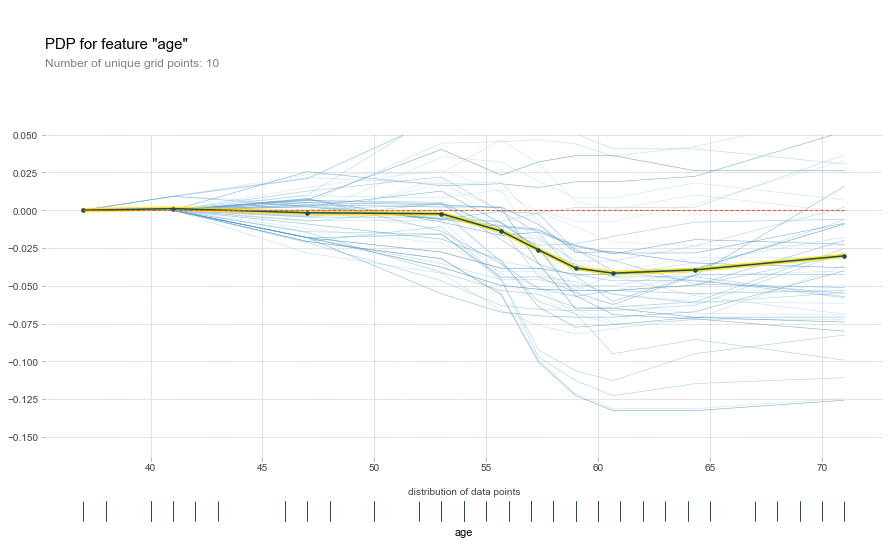

In [13]:
feat_name = 'age'
nick_name = 'age'
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_features, feature=feat_name
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (9).

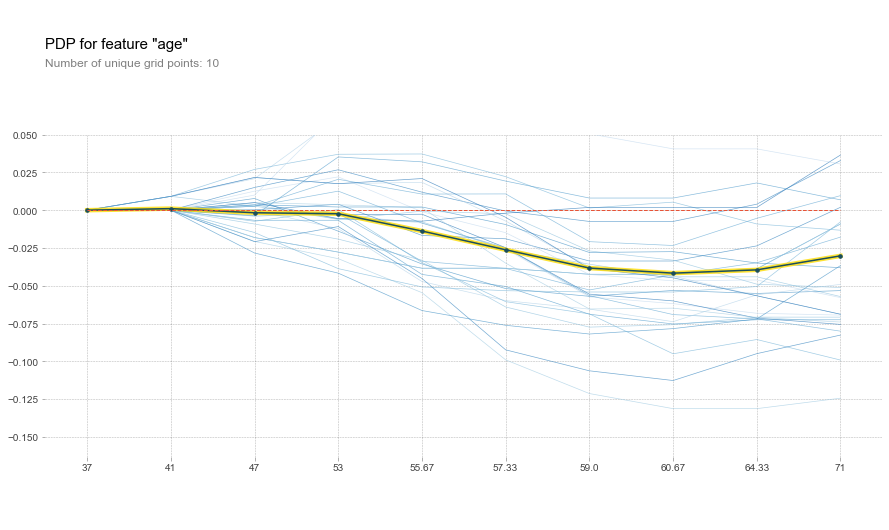

In [14]:
fig, axes = pdp.pdp_plot(
    pdp_dist, nick_name, frac_to_plot=0.5, plot_lines=True, x_quantile=True, show_percentile=True, plot_pts_dist=True
)

# 深入理解最大心率对预测结果的影响

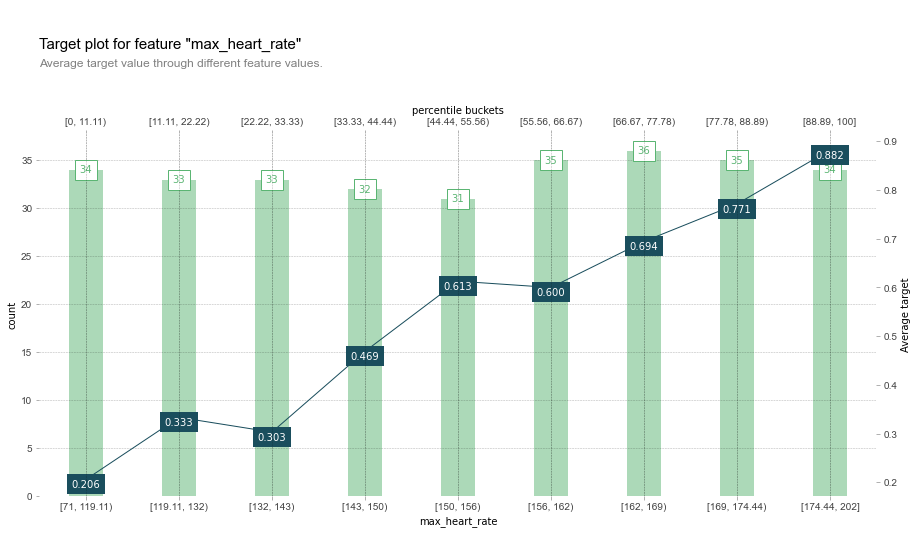

In [15]:
feat_name = 'max_heart_rate_achieved'
nick_name = 'max_heart_rate'
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature=feat_name, feature_name=nick_name, target='target', show_percentile=True
)

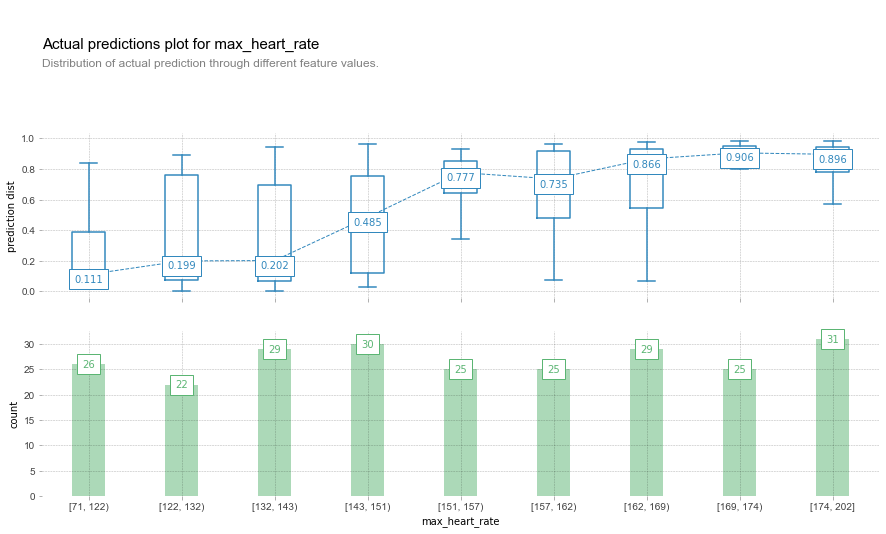

In [16]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature='max_heart_rate_achieved', feature_name='max_heart_rate',predict_kwds={}
)

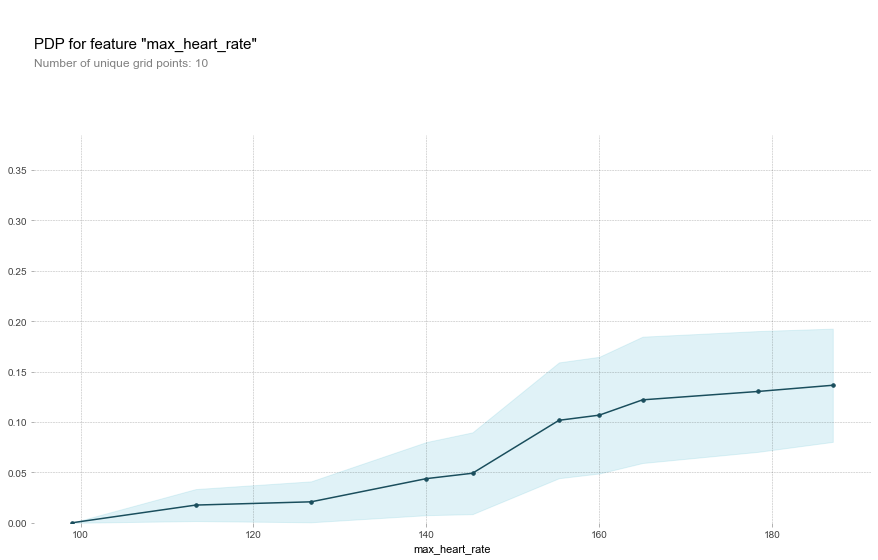

In [17]:
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_features, 
    feature='max_heart_rate_achieved'
)
fig, axes = pdp.pdp_plot(pdp_dist, 'max_heart_rate')

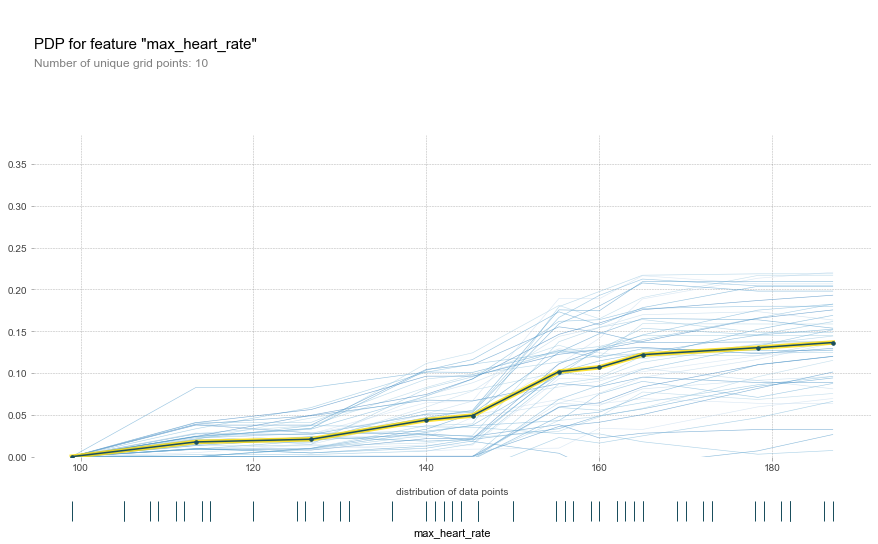

In [18]:
feat_name = 'max_heart_rate_achieved'
nick_name = 'max_heart_rate'
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_features, feature=feat_name
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

# 深入理解地中海贫血症对预测结果的影响

注意，地中海贫血症的三个特征是One-Hot编码。

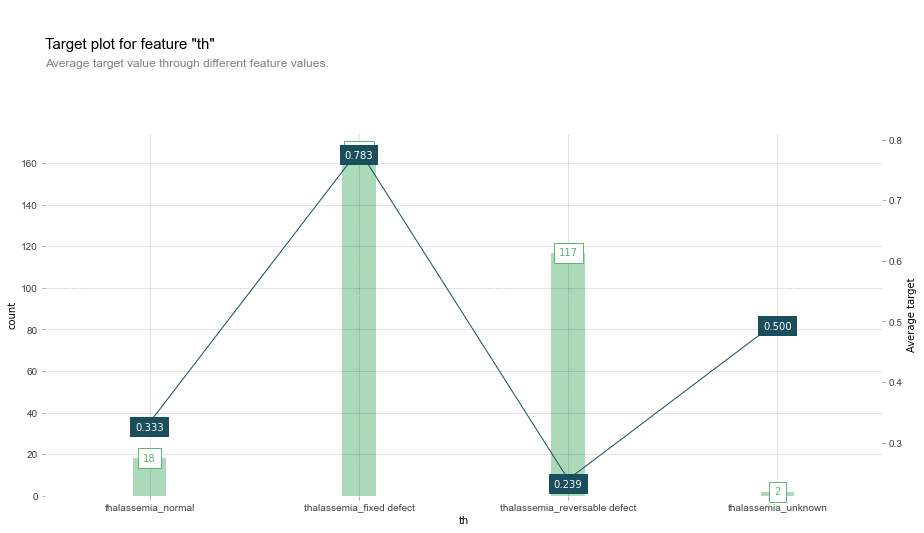

In [19]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature=['thalassemia_normal', 'thalassemia_fixed defect', 'thalassemia_reversable defect', 'thalassemia_unknown'], feature_name='th', 
    target='target'
)

In [20]:
summary_df

,x,display_column,count,target
0,0,thalassemia_normal,18,0.333333
1,1,thalassemia_fixed defect,166,0.783133
2,2,thalassemia_reversable defect,117,0.239316
3,3,thalassemia_unknown,2,0.500000


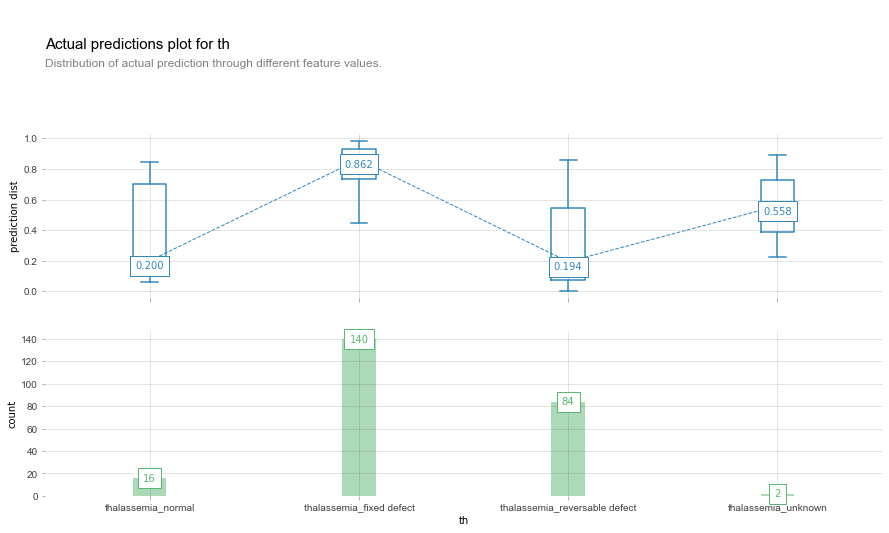

In [21]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature=['thalassemia_normal', 'thalassemia_fixed defect', 'thalassemia_reversable defect',  'thalassemia_unknown'], feature_name='th',predict_kwds={}
)

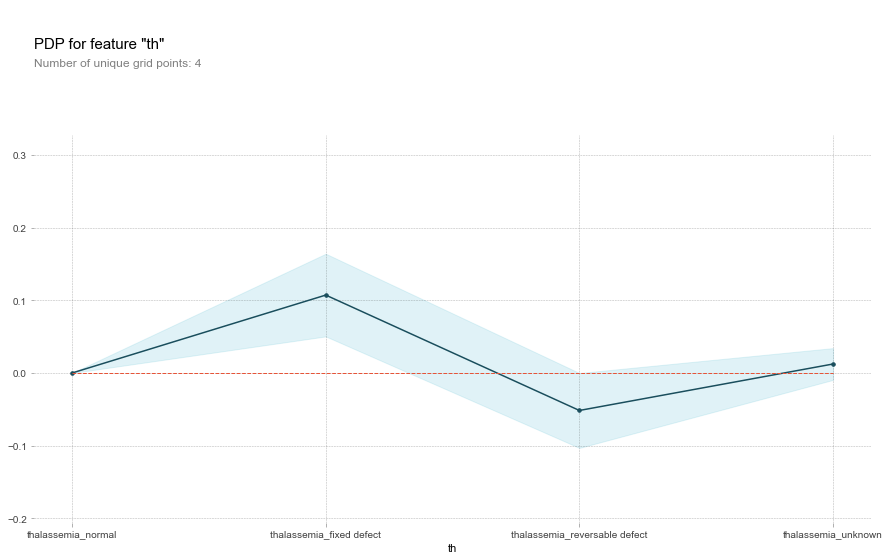

In [22]:
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_features, 
    feature=['thalassemia_normal', 'thalassemia_fixed defect', 'thalassemia_reversable defect', 'thalassemia_unknown']
)
fig, axes = pdp.pdp_plot(pdp_dist, 'th')

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (4).

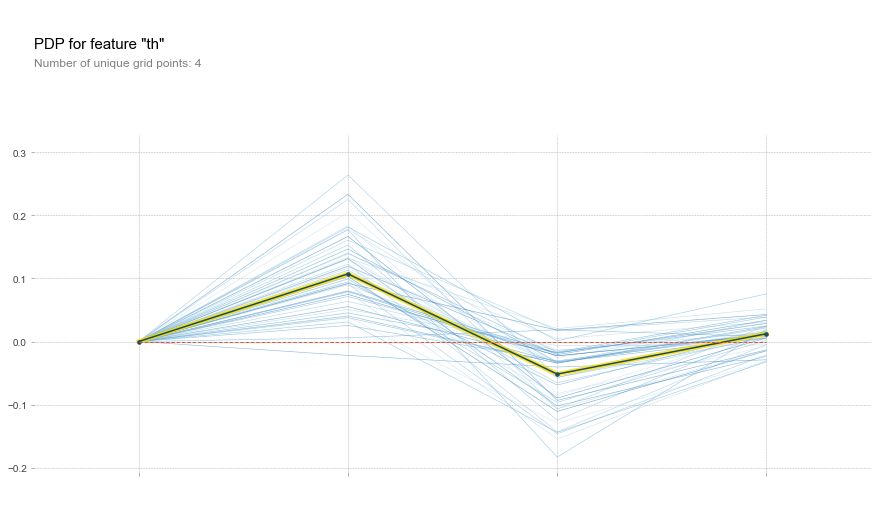

In [23]:
fig, axes = pdp.pdp_plot(pdp_dist, 'th', center=True, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

# PDP图合集，绘制所有特征的PDP图

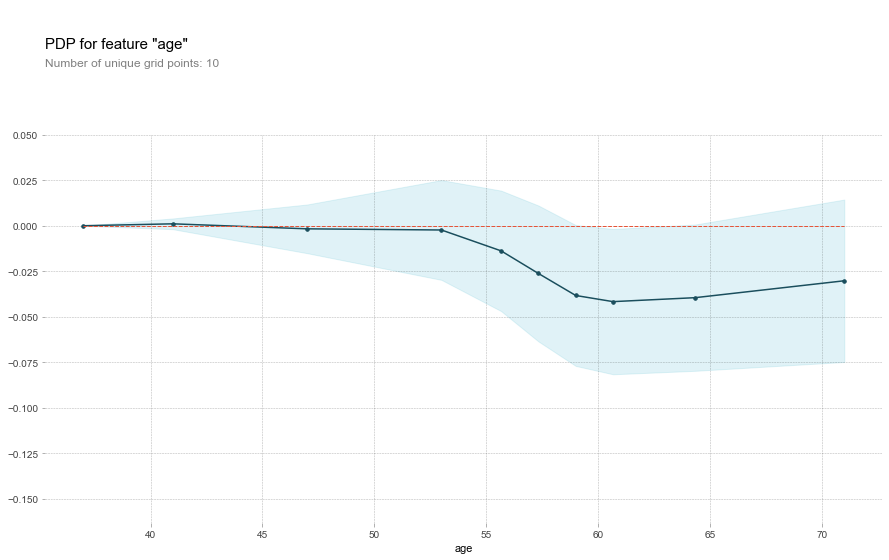

In [24]:
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

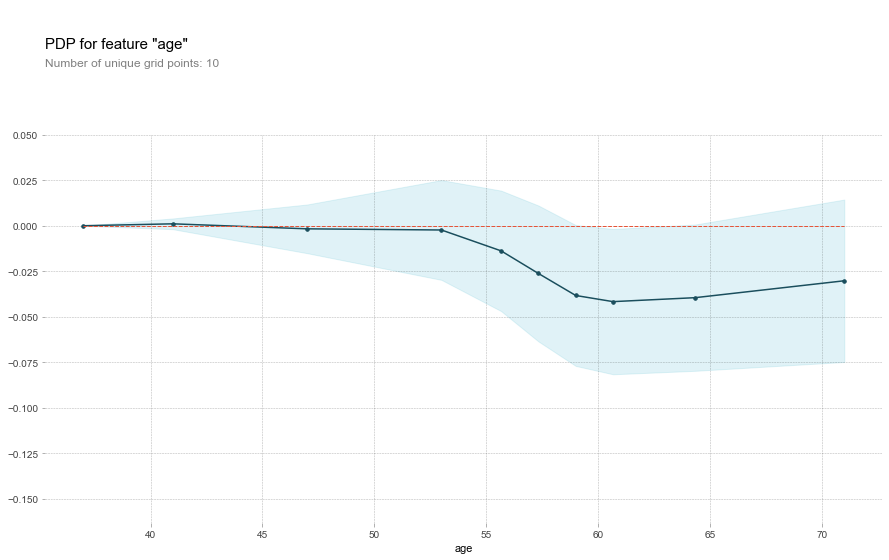

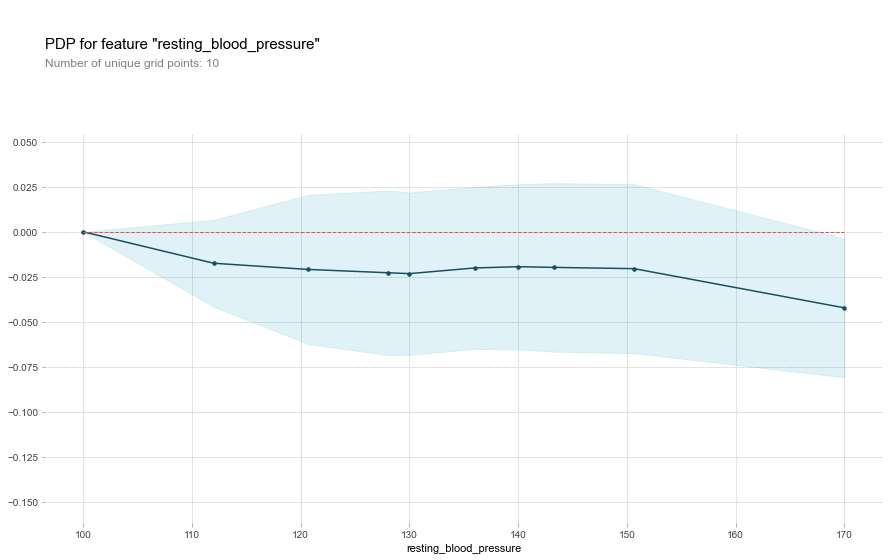

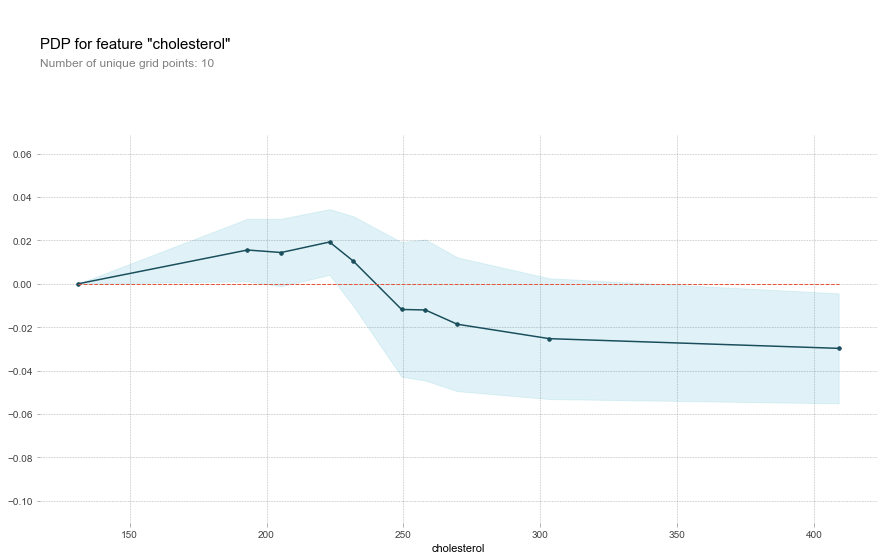

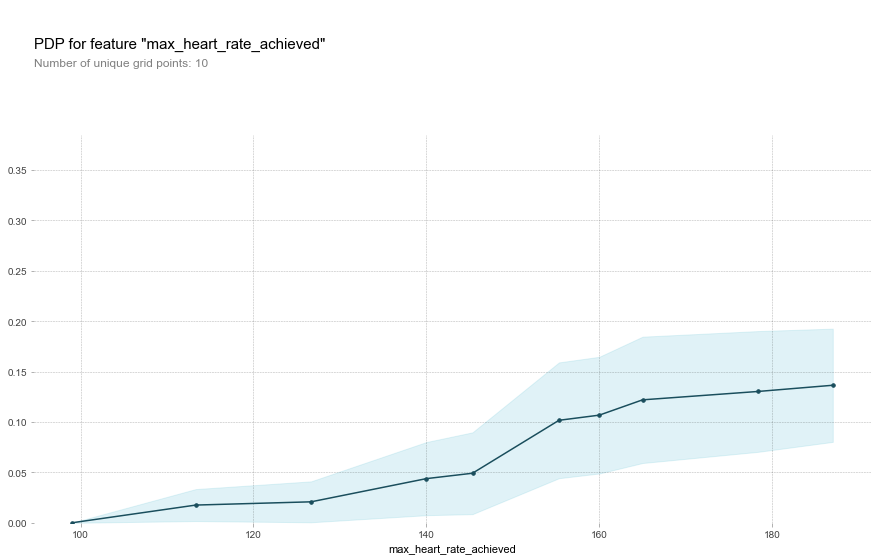

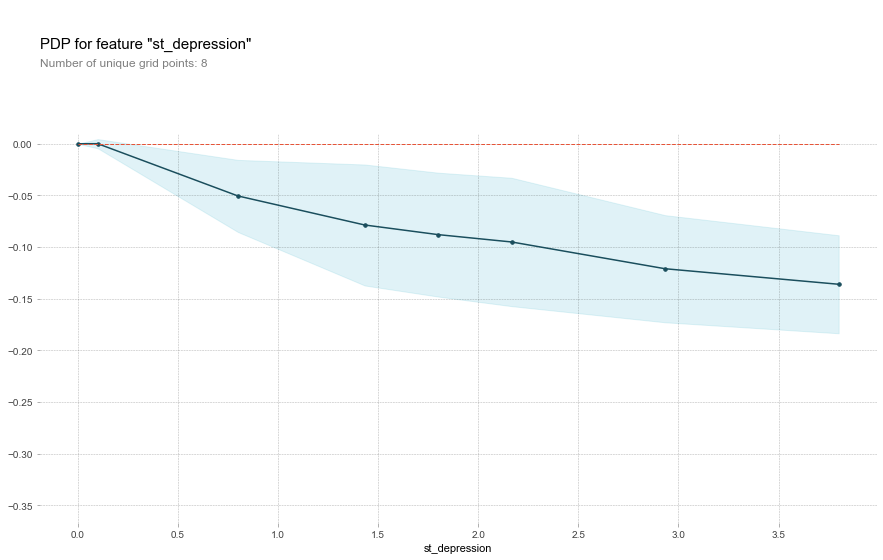

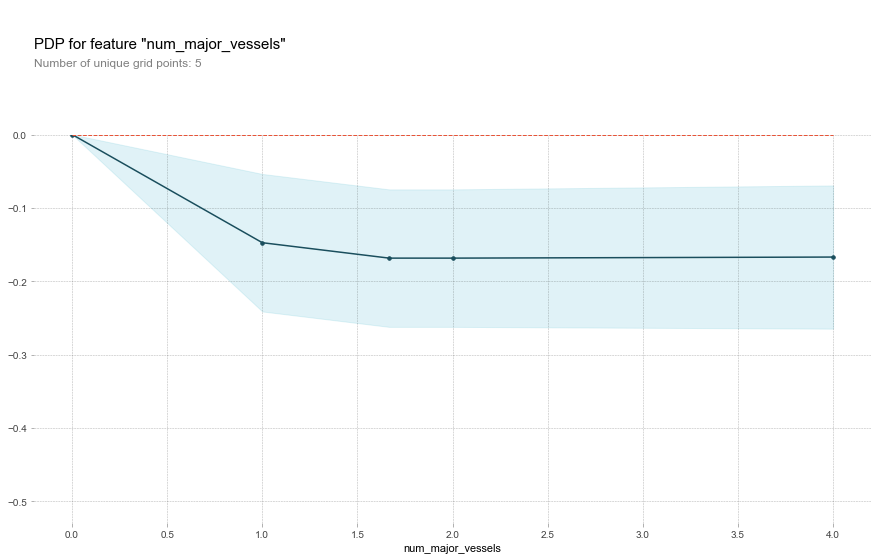

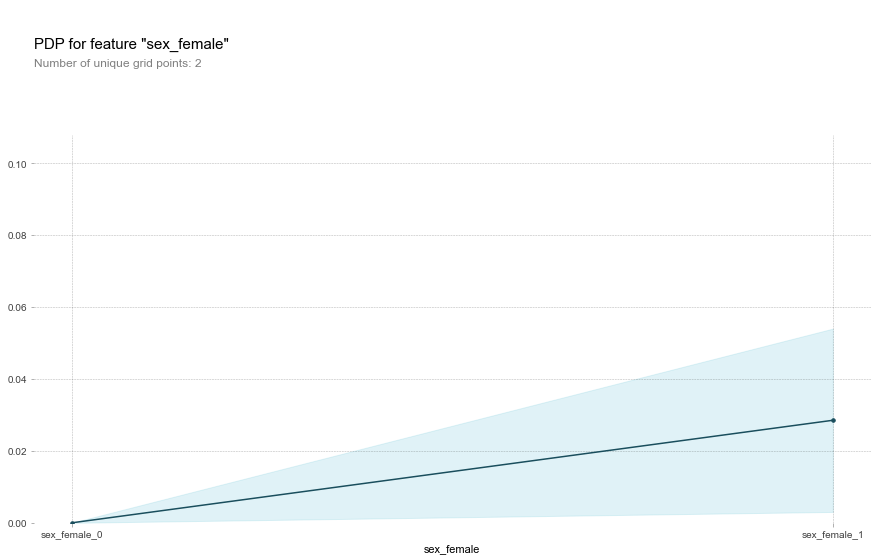

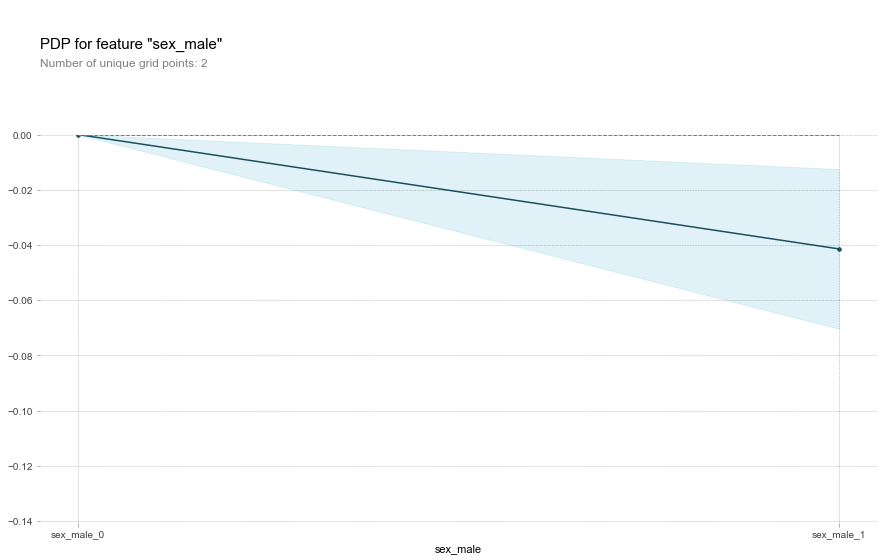

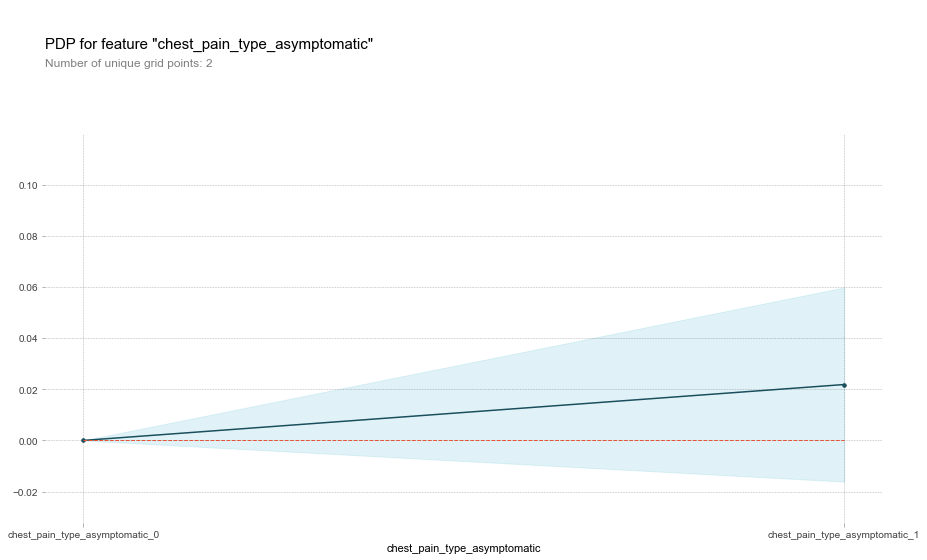

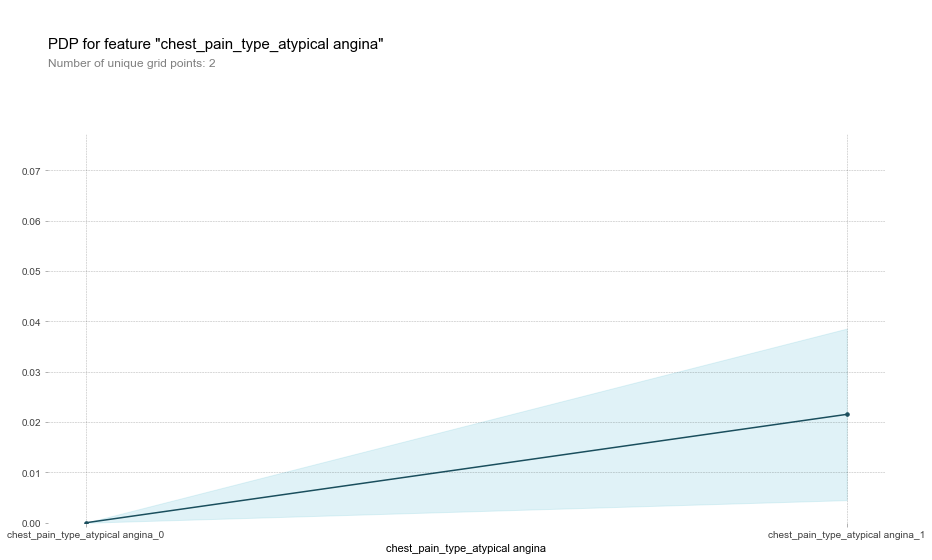

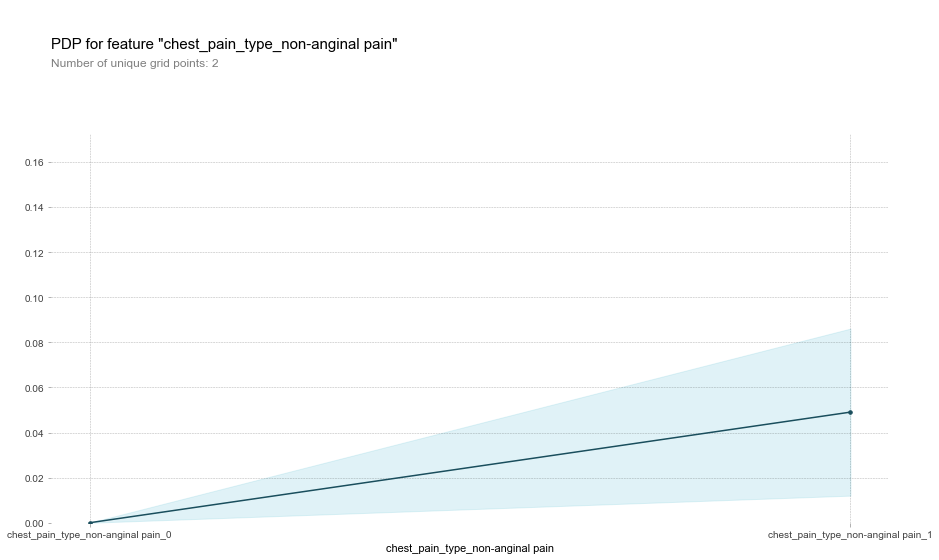

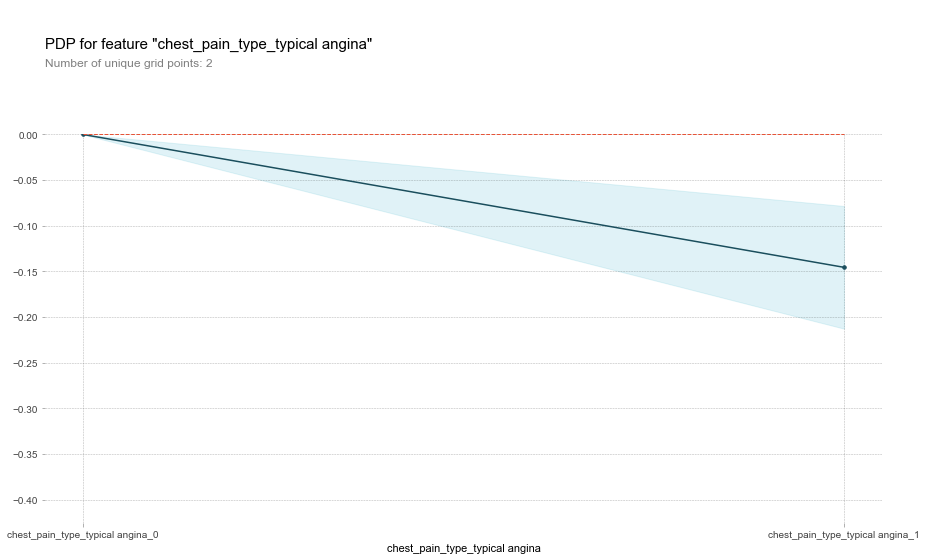

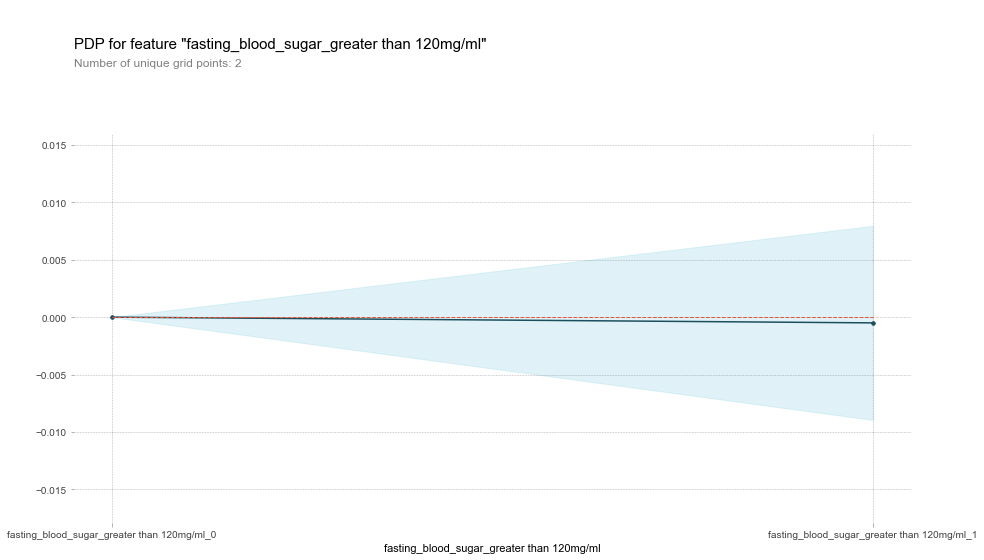

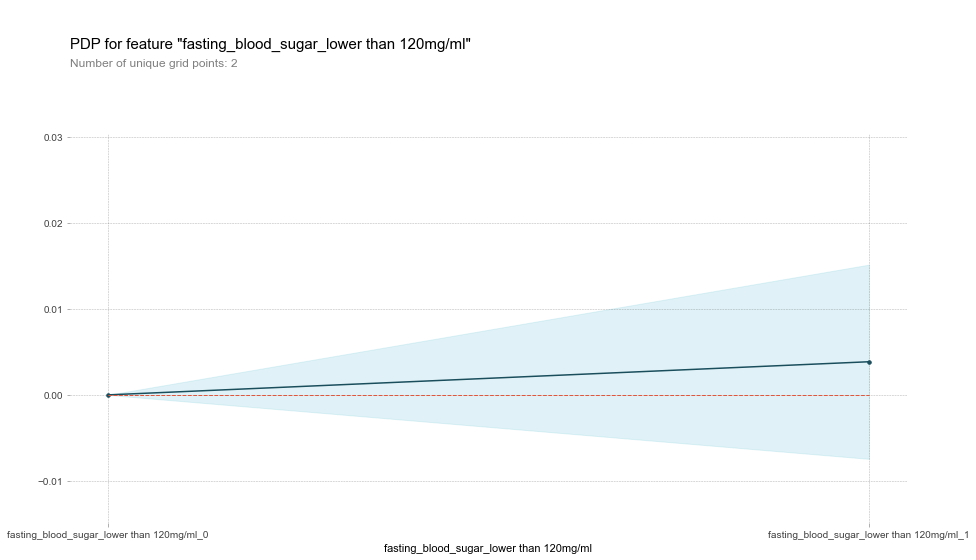

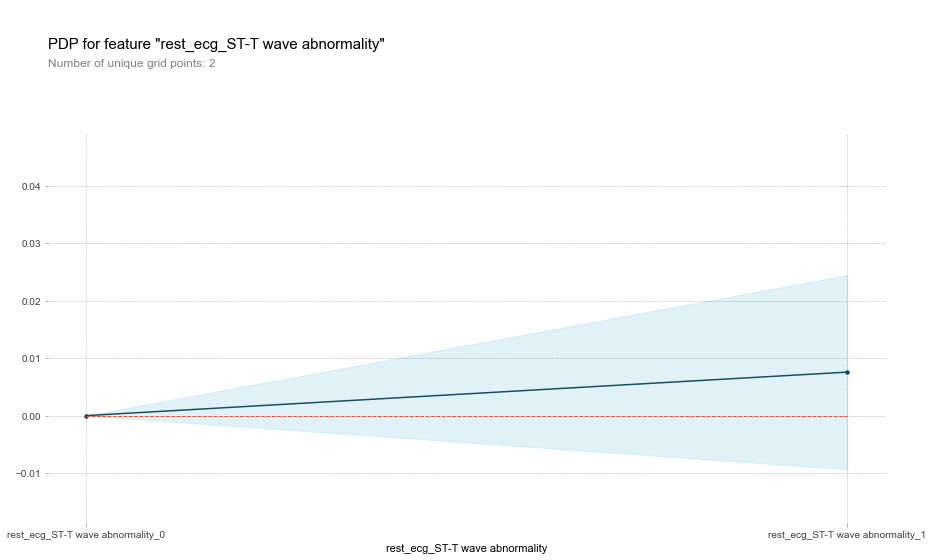

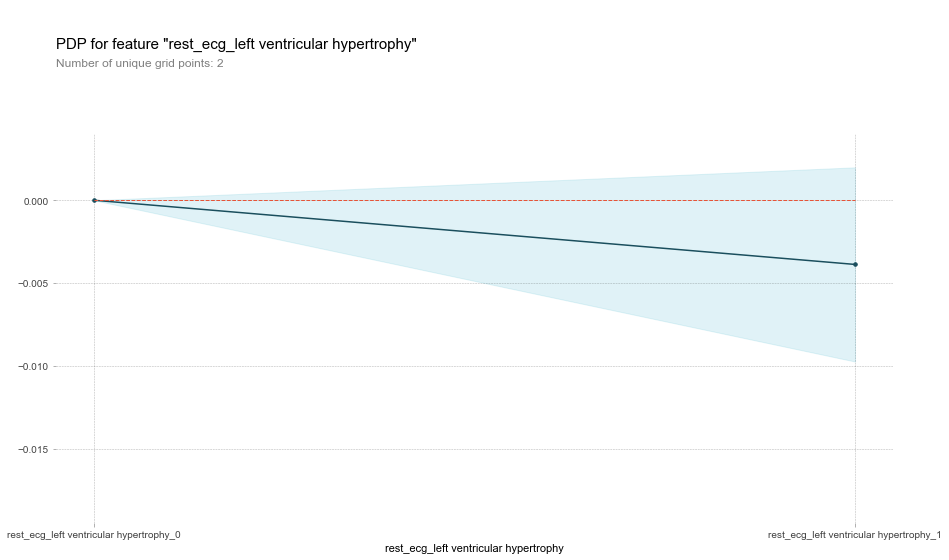

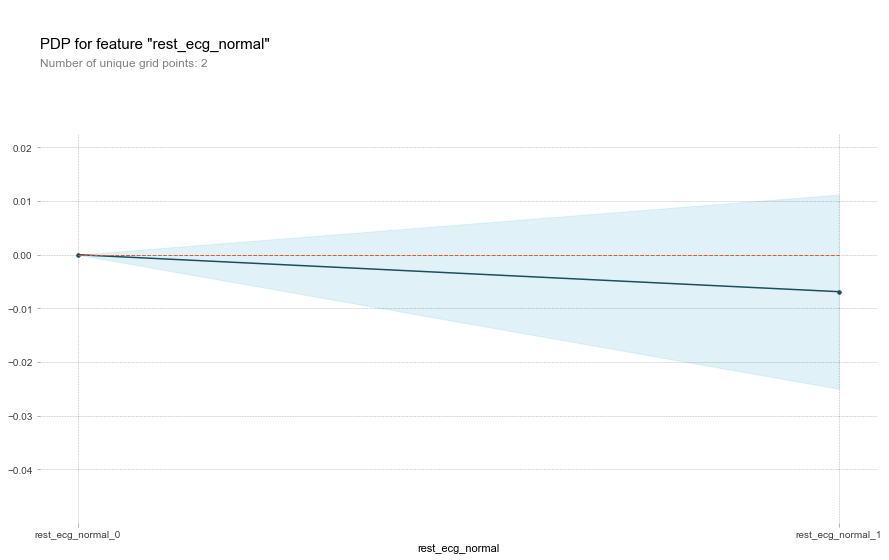

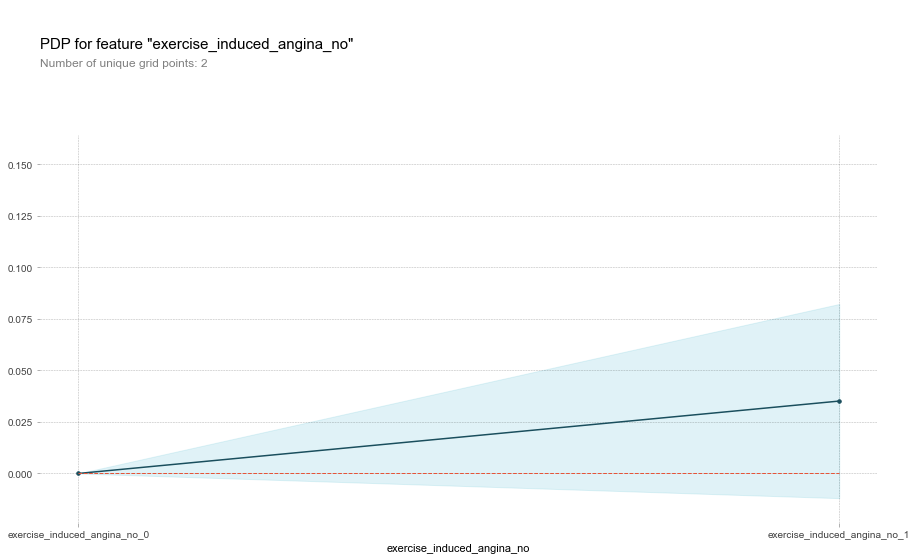

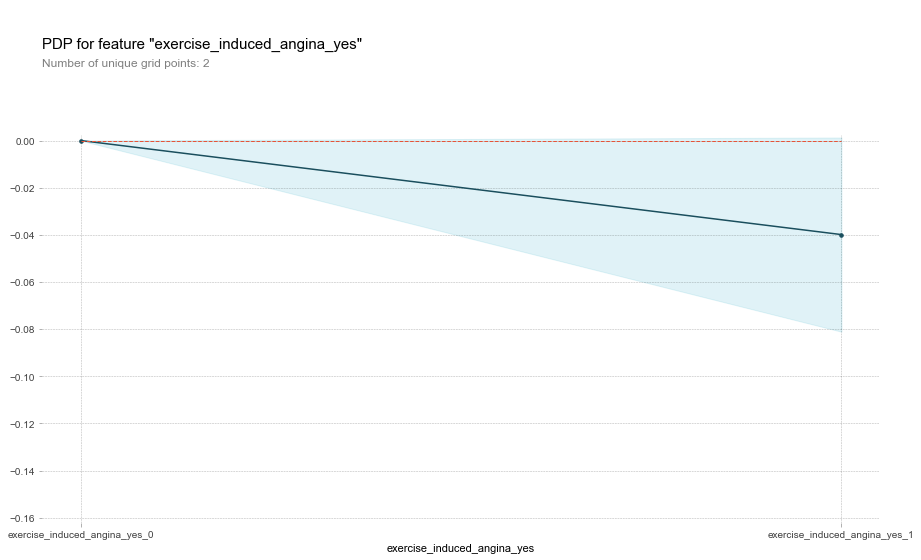

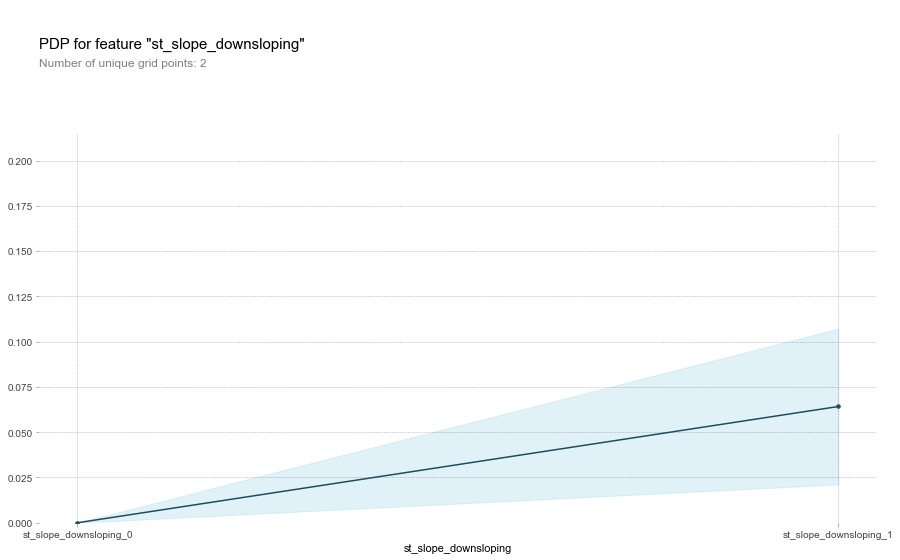

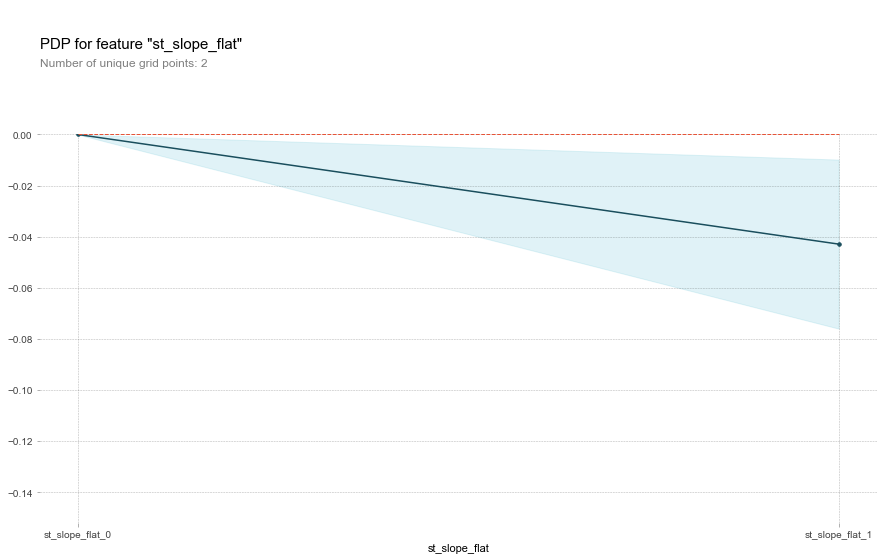

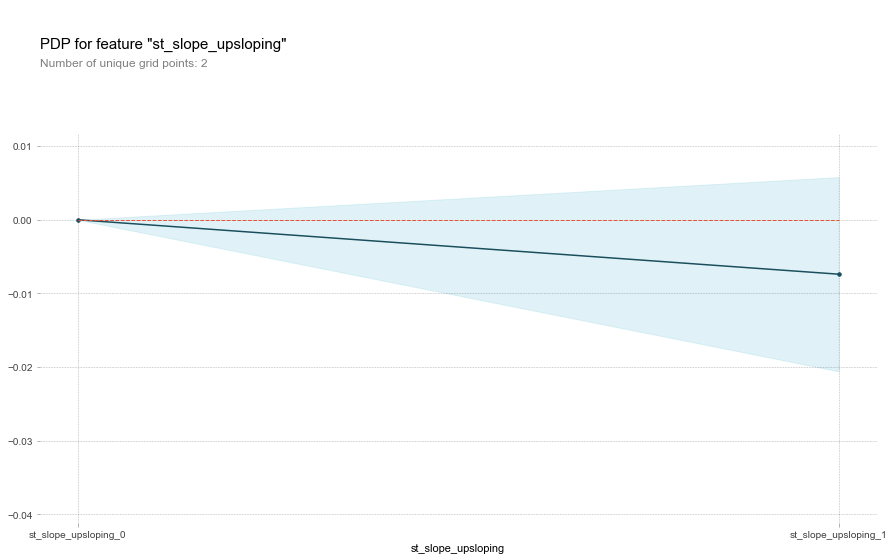

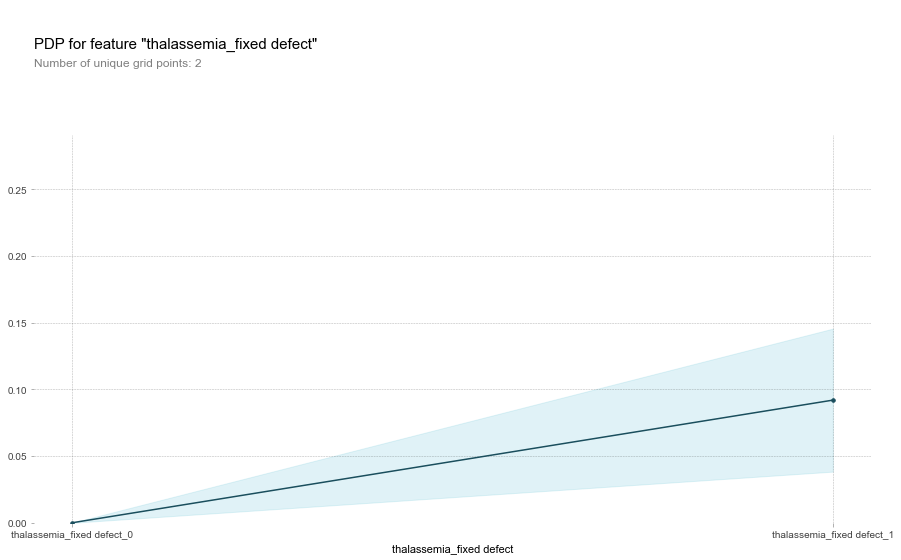

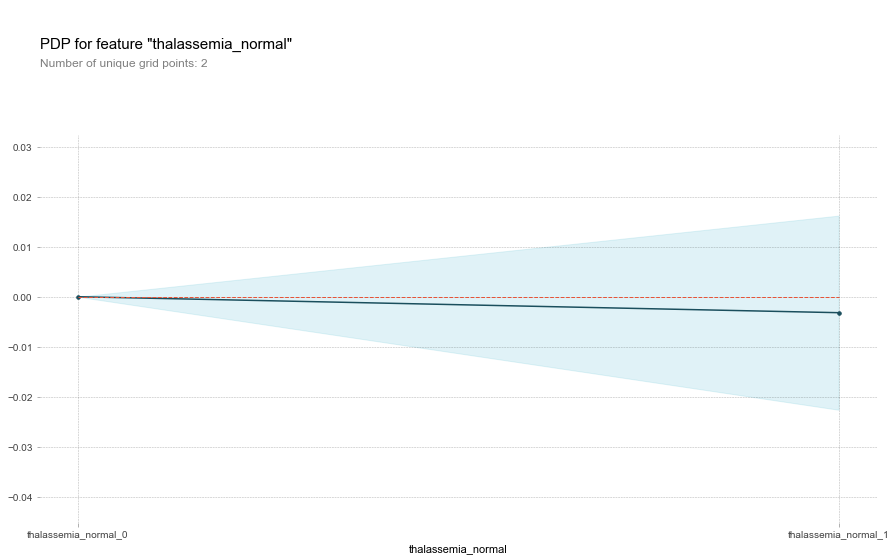

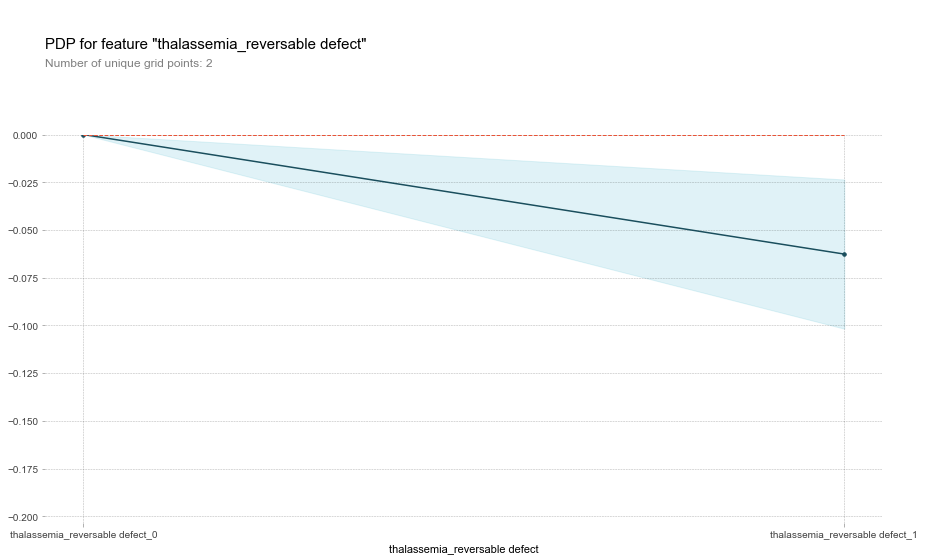

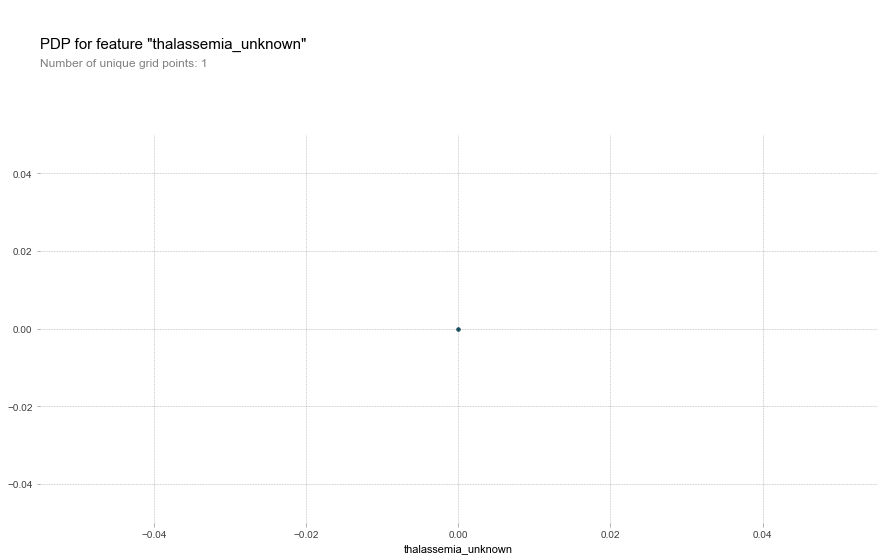

In [25]:
for each in base_features:
    feat_name = each
    pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

# 二维PDP图：特征之间交互关系分析

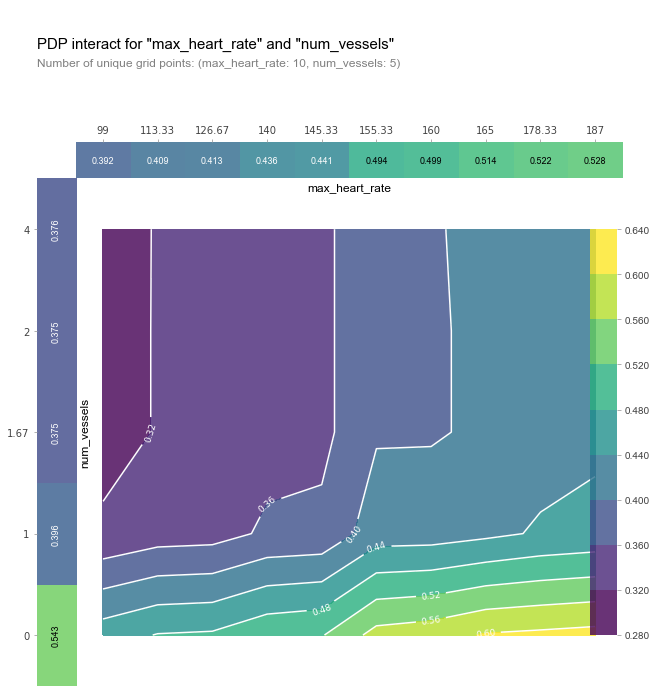

In [26]:
feat_name1 = 'max_heart_rate_achieved'
nick_name1 = 'max_heart_rate'
feat_name2 = 'num_major_vessels'
nick_name2 = 'num_vessels'

inter1 = pdp.pdp_interact(
    model=model, dataset=X_test, model_features=base_features, features=[feat_name1, feat_name2]
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=[nick_name1, nick_name2], plot_type='contour', x_quantile=True, plot_pdp=True
)

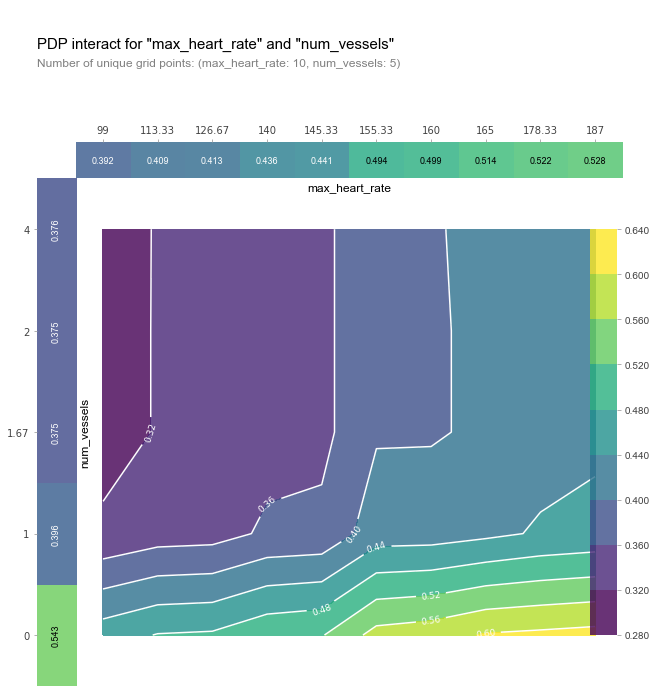

In [27]:
# 坐标轴均匀分割
fig, axes = pdp.pdp_interact_plot(inter1, [nick_name1, nick_name2], plot_type='contour', x_quantile=False, plot_pdp=True)

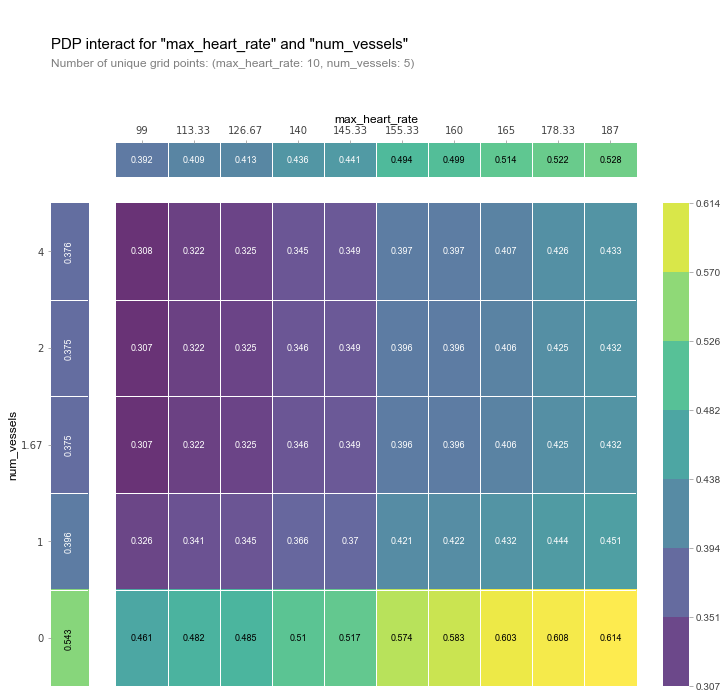

In [28]:
fig, axes = pdp.pdp_interact_plot(inter1, [nick_name1, nick_name2], plot_type='grid', x_quantile=True, plot_pdp=True)

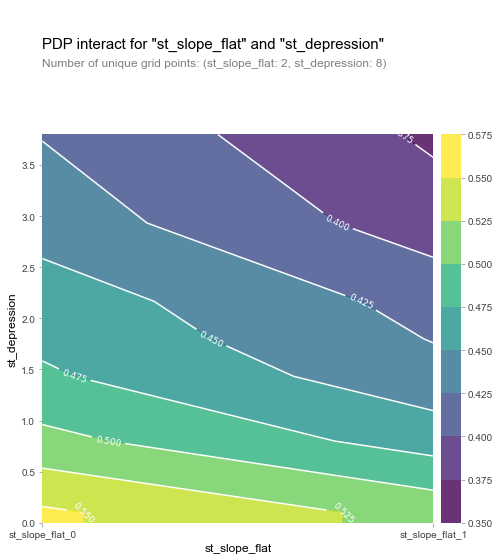

In [29]:
feat_name1 = 'st_slope_flat'
nick_name1 = 'st_slope_flat'
feat_name2 = 'st_depression'
nick_name2 = 'st_depression'

inter1 = pdp.pdp_interact(
    model=model, dataset=X_test, model_features=base_features, features=[feat_name1, feat_name2]
)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['st_slope_flat', 'st_depression'])
plt.show()

In [30]:
df.columns

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'sex_female', 'sex_male', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina',
       'fasting_blood_sugar_greater than 120mg/ml',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_ST-T wave abnormality',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_no', 'exercise_induced_angina_yes',
       'st_slope_downsloping', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect', 'thalassemia_unknown'],
      dtype='object')

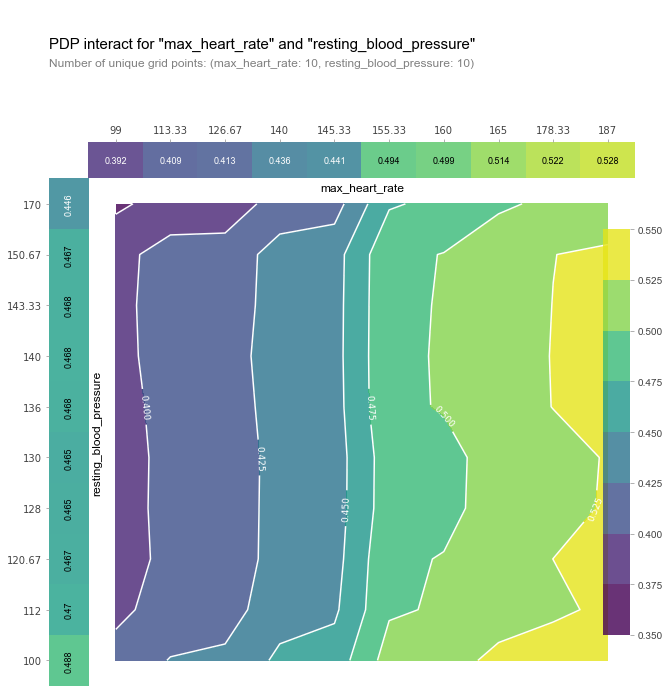

In [31]:
feat_name1 = 'max_heart_rate_achieved'
nick_name1 = 'max_heart_rate'
feat_name2 = 'resting_blood_pressure'
nick_name2 = 'resting_blood_pressure'

inter1 = pdp.pdp_interact(
    model=model, dataset=X_test, model_features=base_features, features=[feat_name1, feat_name2]
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=[nick_name1, nick_name2], plot_type='contour', x_quantile=True, plot_pdp=True
)